# KLIB

https://pypi.org/project/klib/

In [ ]:
#!pip install klib

In [3]:
import klib
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

# klib.describe functions for visualizing datasets
- klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features
- klib.corr_mat(df) # returns a color-encoded correlation matrix
- klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations
- klib.dist_plot(df) # returns a distribution plot for every numeric feature
- klib.missingval_plot(df) # returns a figure containing information about missing values

TypeError: 'bool' object is not subscriptable

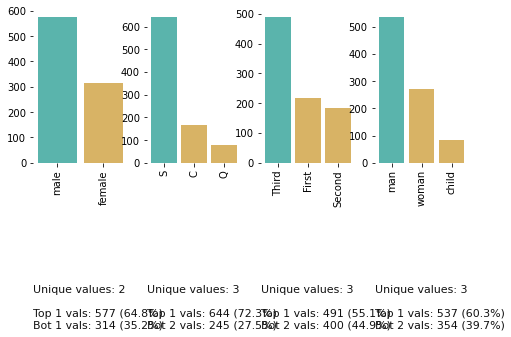

In [5]:
klib.cat_plot(df)# returns a visualization of the number and frequency of categorical features

In [7]:
klib.corr_mat(df) # returns a color-encoded correlation matrix

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.00,-0.34,-0.08,-0.04,0.08,0.26,-0.56,-0.20
pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55,0.09,0.14
age,-0.08,-0.37,1.00,-0.31,-0.19,0.10,0.28,0.20
sibsp,-0.04,0.08,-0.31,1.00,0.41,0.16,-0.25,-0.58
parch,0.08,0.02,-0.19,0.41,1.00,0.22,-0.35,-0.58
fare,0.26,-0.55,0.10,0.16,0.22,1.00,-0.18,-0.27
adult_male,-0.56,0.09,0.28,-0.25,-0.35,-0.18,1.00,0.40
alone,-0.20,0.14,0.20,-0.58,-0.58,-0.27,0.40,1.00


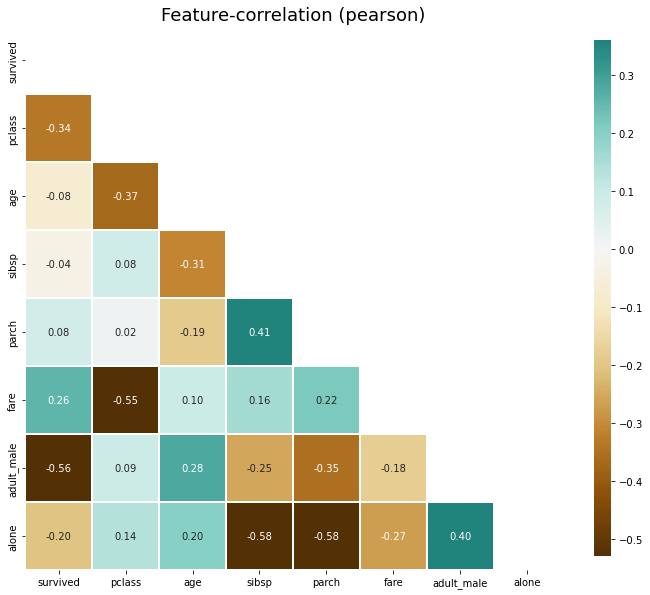

In [8]:
klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations

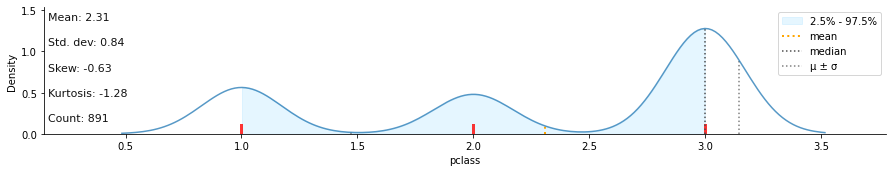

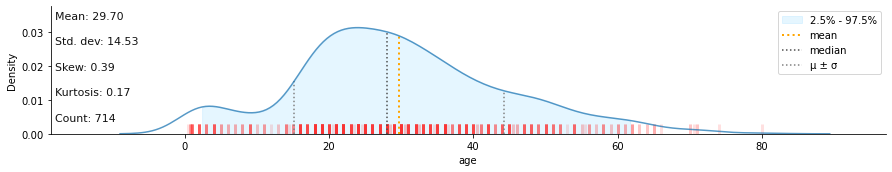

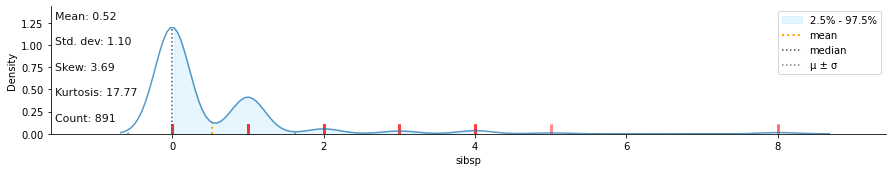

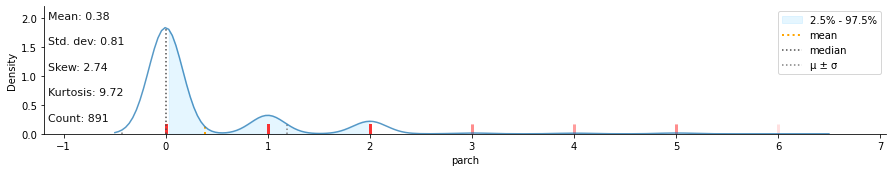

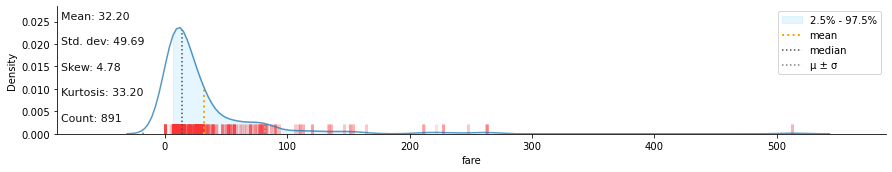

In [9]:
klib.dist_plot(df) # returns a distribution plot for every numeric feature

GridSpec(6, 6)

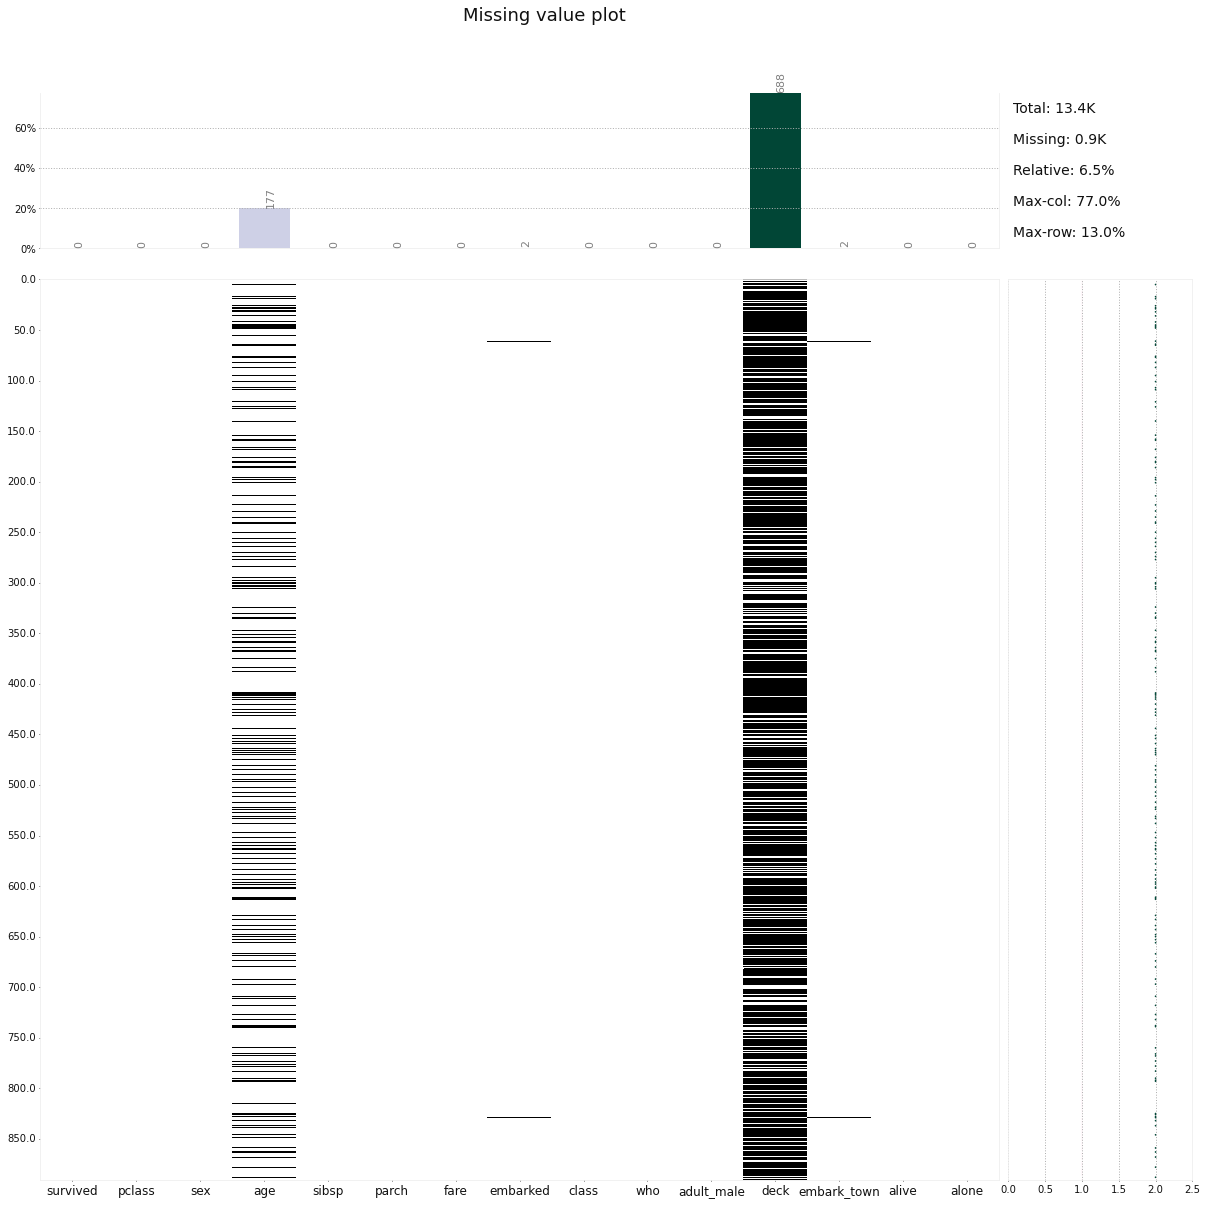

In [10]:
klib.missingval_plot(df) # returns a figure containing information about missing values

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


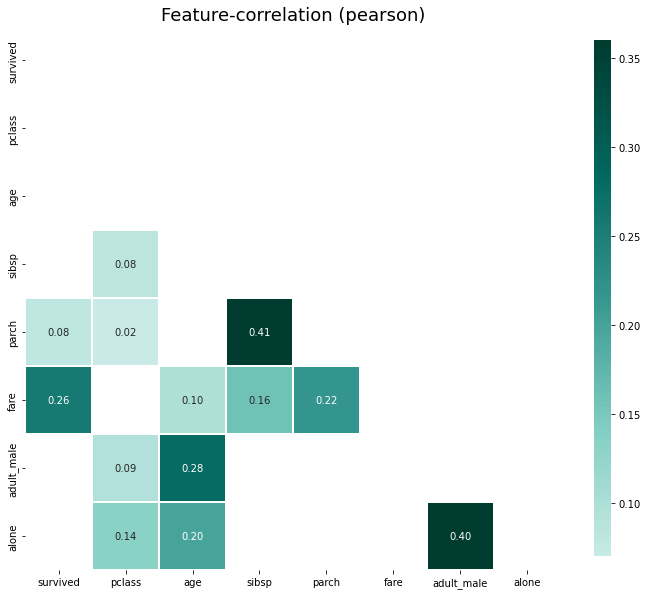

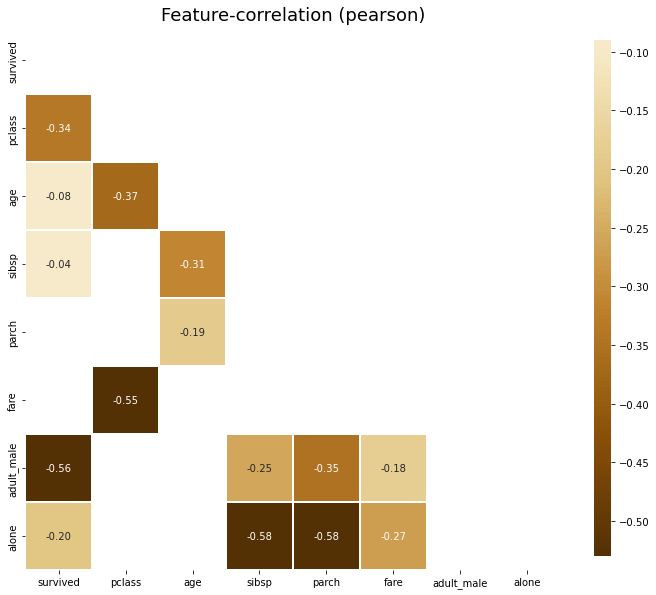

In [20]:
klib.corr_plot(df, split='pos') # displaying only positive correlations, other settings include threshold, cmap...
klib.corr_plot(df, split='neg') # displaying only negative correlations

# klib.clean functions for cleaning datasets
- klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
- klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()
- klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()
- klib.drop_missing(df) # drops missing values, also called in data_cleaning()
- klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content
- klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
df1=klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int8    
 1   pclass       891 non-null    int8    
 2   sex          891 non-null    category
 3   age          714 non-null    Float32 
 4   sibsp        891 non-null    int8    
 5   parch        891 non-null    int8    
 6   fare         891 non-null    Float32 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    boolean 
 11  deck         203 non-null    category
 12  embark_town  889 non-null    category
 13  alive        891 non-null    category
 14  alone        891 non-null    boolean 
dtypes: Float32(2), boolean(2), category(7), int8(4)
memory usage: 23.0 KB


GridSpec(6, 7)

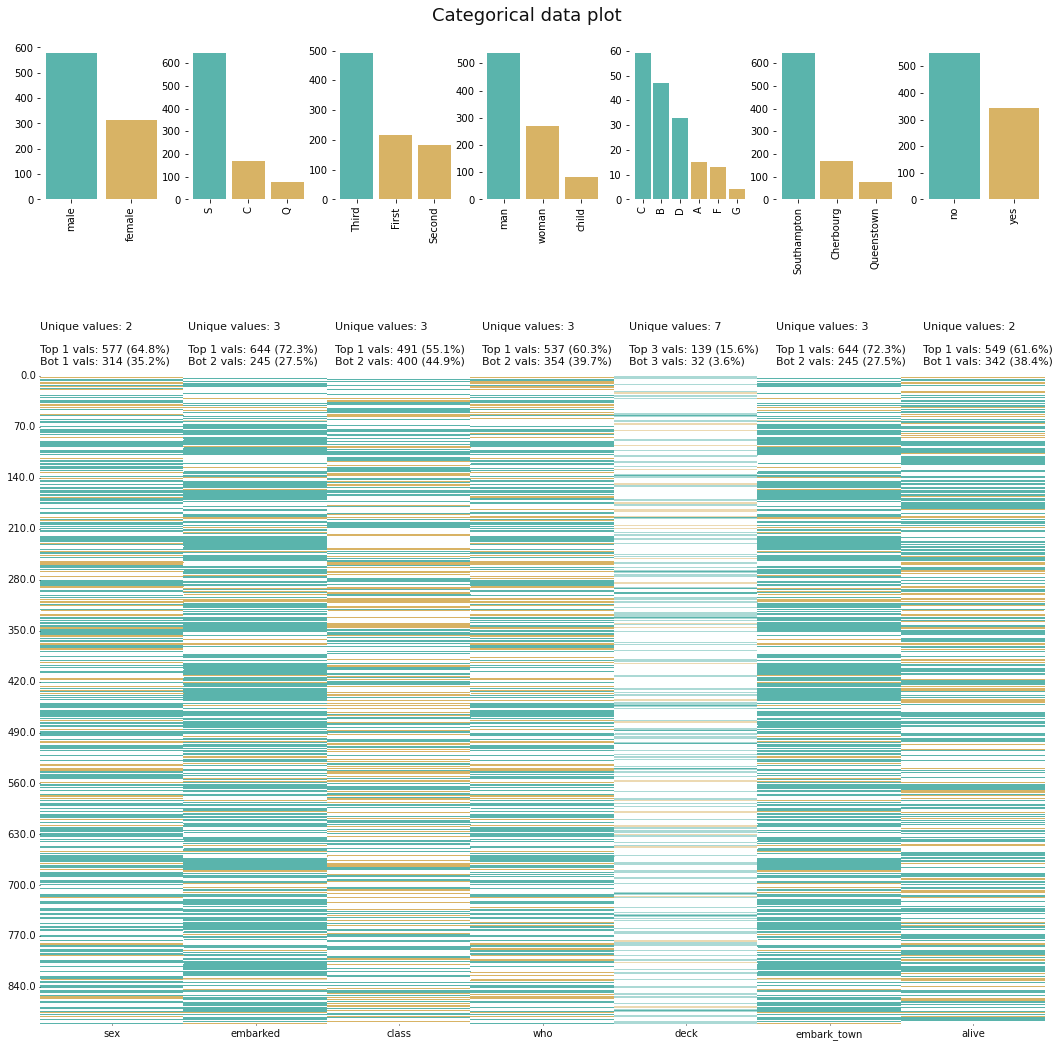

In [15]:
klib.cat_plot(df1)

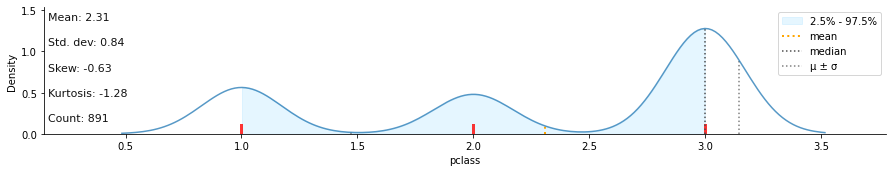

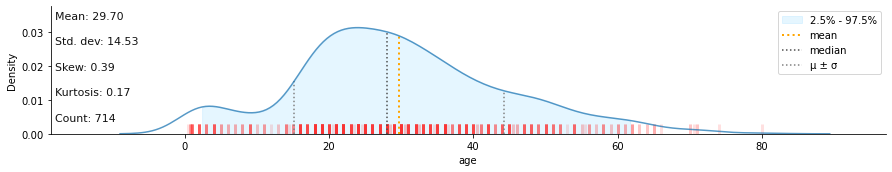

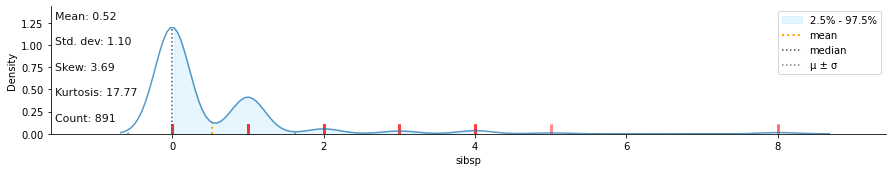

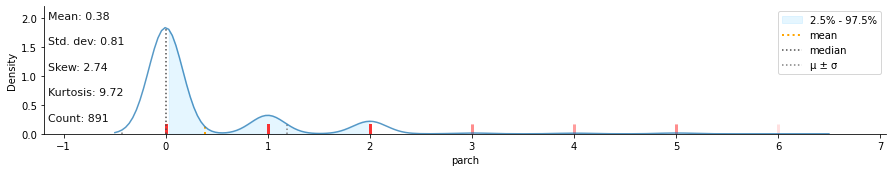

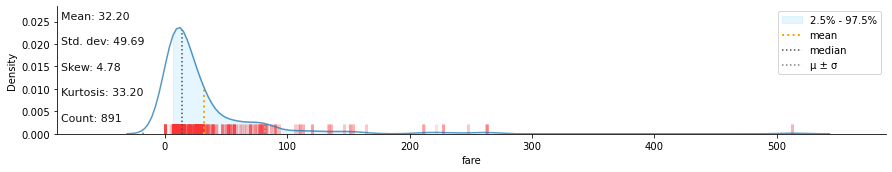

In [26]:
klib.dist_plot(df) # default representation of a distribution plot, other settings include fill_range, histogram, ...

In [31]:
klib.corr_plot(df1.select_dtypes(exclude=["number"]), target='alone') # default representation of correlations with the feature column

KeyError: 'alone'

# klib.preprocess functions for data preprocessing (feature selection, scaling, ...)
- klib.train_dev_test_split(df) # splits a dataset and a label into train, optionally dev and test sets
- klib.feature_selection_pipe() # provides common operations for feature selection
- klib.num_pipe() # provides common operations for preprocessing of numerical data
- klib.cat_pipe() # provides common operations for preprocessing of categorical data
- klib.preprocess.ColumnSelector() # selects num or cat columns, ideal for a Feature Union or Pipeline
- klib.preprocess.PipeInfo() # prints out the shape of the data at the specified step of a Pipeline

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int8    
 1   pclass       891 non-null    int8    
 2   sex          891 non-null    category
 3   age          714 non-null    Float32 
 4   sibsp        891 non-null    int8    
 5   parch        891 non-null    int8    
 6   fare         891 non-null    Float32 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    boolean 
 11  deck         203 non-null    category
 12  embark_town  889 non-null    category
 13  alive        891 non-null    category
 14  alone        891 non-null    boolean 
dtypes: Float32(2), boolean(2), category(7), int8(4)
memory usage: 23.0 KB


In [30]:
df.select_dtypes(exclude=["number"])

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True
